# DATOS PASAPORTE ACCESIONES FRIJOL

## Paseolus *vulgaris*



In [36]:
#Importando librerías para el proceos de limpieza de datos
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
world = gpd.read_file('https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip')
# Opcional: Para hacer análisis geospatial más adelante

# Configuración para visualizaciones
plt.style.use('ggplot')
sns.set_palette("viridis")
%matplotlib inline

## Pipeline del flujo de limpieza de los datos

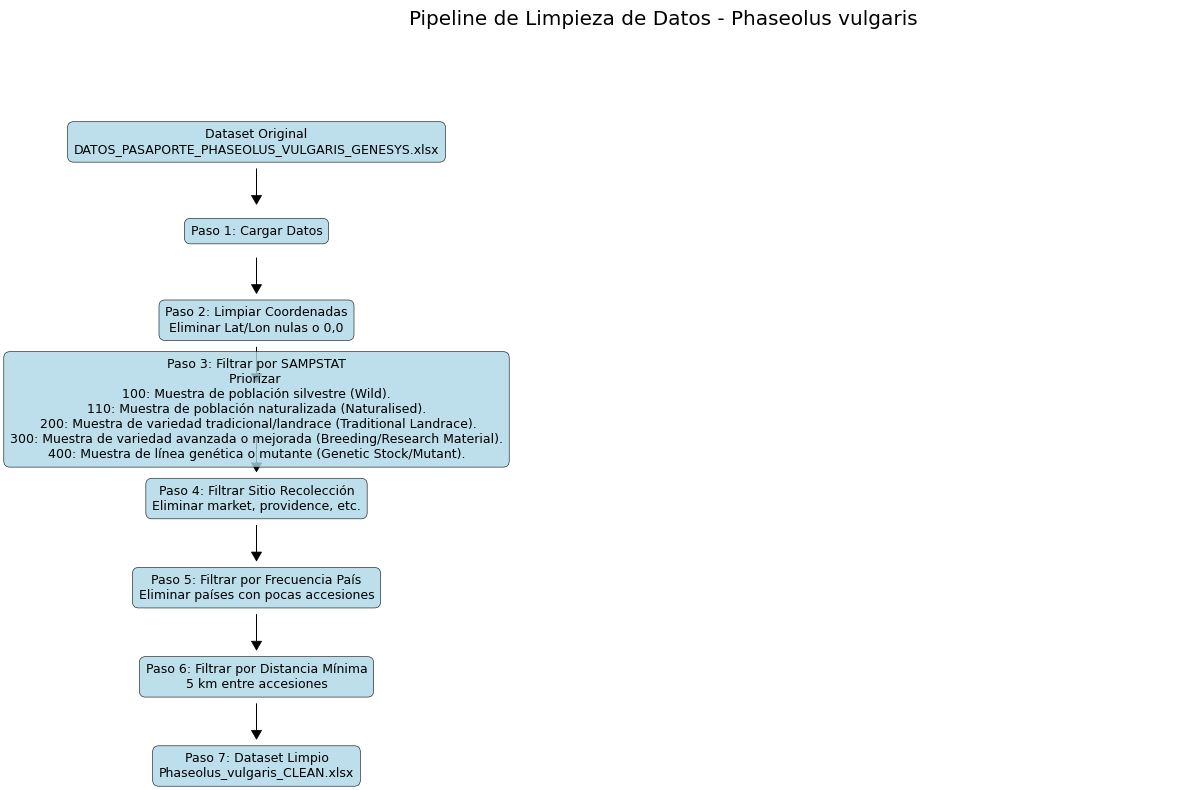

In [25]:
#Creación de pipeline de limpieza de los datos
# Dibujando el lienzo
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.axis('off')

# Nodos
nodes = {
    'A': (1, 7, 'Dataset Original\nDATOS_PASAPORTE_PHASEOLUS_VULGARIS_GENESYS.xlsx'),
    'B': (1, 6, 'Paso 1: Cargar Datos'),
    'C': (1, 5, 'Paso 2: Limpiar Coordenadas\nEliminar Lat/Lon nulas o 0,0'),
    'D': (1, 4, 'Paso 3: Filtrar por SAMPSTAT\nPriorizar \n100: Muestra de población silvestre (Wild).\n110: Muestra de población naturalizada (Naturalised).\n 200: Muestra de variedad tradicional/landrace (Traditional Landrace).\n300: Muestra de variedad avanzada o mejorada (Breeding/Research Material).\n400: Muestra de línea genética o mutante (Genetic Stock/Mutant).'),
    'E': (1, 3, 'Paso 4: Filtrar Sitio Recolección\nEliminar market, providence, etc.'),
    'F': (1, 2, 'Paso 5: Filtrar por Frecuencia País\nEliminar países con pocas accesiones'),
    'G': (1, 1, 'Paso 6: Filtrar por Distancia Mínima\n5 km entre accesiones'),
    'H': (1, 0, 'Paso 7: Dataset Limpio\nPhaseolus_vulgaris_CLEAN.xlsx')
}

# Dibujando los nodos
for key, (x, y, label) in nodes.items():
    ax.text(x, y, label, ha='center', va='center', 
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", 
                     edgecolor="black", alpha=0.8), fontsize=9)
    
    # Dibujando las flechas de dirección de flujo
    if key != 'H':
        ax.arrow(x, y-0.3, 0, -0.4, head_width=0.1, head_length=0.1, 
                fc='black', ec='black', length_includes_head=True)

plt.title('Pipeline de Limpieza de Datos - Phaseolus vulgaris', pad=20)
plt.tight_layout()
plt.show()

## **Paso 1.** Carga de los datos

In [26]:
# Paso 1. Cargando los datos en documento excel
df = pd.read_excel('DATOS_PASAPORTE_PHASEOLUS_VULGARIS_GENESYS.xlsx', sheet_name='MCPD')

#MVisualizando los datos (Resumen)
print("Dimensiones del DataFrame:", df.shape)
df.head()

C:\Users\guill\miniconda3\envs\python_env\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: Descriptors!$A:$D.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\guill\miniconda3\envs\python_env\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Legal information'!$A:$B.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Dimensiones del DataFrame: (32330, 51)


,INSTCODE,DOI,ACCENUMB,HISTORIC,CURATION,GENUS,SPECIES,SPAUTHOR,SUBTAXA,SUBTAUTHOR,...,DUPLINSTNAME,STORAGE,MLSSTAT,ACCEURL,REMARKS,AEGIS,AVAILABLE,DATAPROVIDERID,UUID,LASTMODIFIED
0,COL003,10.18730/JKECH,G16570,False,FULL,Phaseolus,vulgaris,NaN,NaN,NaN,...,NaN,10,True,http://genebank.ciat.cgiar.org/genebank/bacces...,NaN,False,True,NaN,26172e23-c4e3-4676-8384-9e7c84acf9ac,2025-03-11 16:34:59
1,COL003,10.18730/JKEDJ,G16571,False,FULL,Phaseolus,vulgaris,NaN,NaN,NaN,...,NaN,10,True,http://genebank.ciat.cgiar.org/genebank/bacces...,NaN,False,True,NaN,99161e18-ab78-465e-9f25-18afd2b20447,2025-03-11 16:34:59
2,COL003,10.18730/JKEEK,G16572,False,FULL,Phaseolus,vulgaris,NaN,NaN,NaN,...,NaN,10,True,http://genebank.ciat.cgiar.org/genebank/bacces...,NaN,False,True,NaN,b7fdcac8-9e10-4b10-9092-75716c3fd624,2025-03-11 16:34:59
3,COL003,10.18730/JKEFM,G16573,False,FULL,Phaseolus,vulgaris,NaN,NaN,NaN,...,NaN,10,True,http://genebank.ciat.cgiar.org/genebank/bacces...,NaN,False,True,NaN,f23e5b11-c59f-4ddf-aa51-864fa159a128,2025-03-11 16:34:59
4,COL003,10.18730/JKEHP,G16574,False,FULL,Phaseolus,vulgaris,NaN,NaN,NaN,...,NaN,10,True,http://genebank.ciat.cgiar.org/genebank/bacces...,NaN,False,True,NaN,d1b5d211-bdfe-40ea-ab84-bc1803bbdb5f,2025-03-11 16:34:59


## **Paso 2.** Limpieza de datos nulos en coordenadas

In [27]:
# Paso 2. 
# Copia el dataset para realizar el trabajo de limpieza
df_clean = df.copy()

# Eliminando filas donde LAT o LON son nulos o cero. Primero, se convierte el dato de las colmnas a numérico para manejar errores si hay texto
df_clean['DECLATITUDE'] = pd.to_numeric(df_clean['DECLATITUDE'], errors='coerce')
df_clean['DECLONGITUDE'] = pd.to_numeric(df_clean['DECLONGITUDE'], errors='coerce')

# Filtrando filas donde LAT o LON son NaN o 0.0
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['DECLATITUDE', 'DECLONGITUDE'])
df_clean = df_clean[(df_clean['DECLATITUDE'] != 0) & (df_clean['DECLONGITUDE'] != 0)]
final_count = len(df_clean)

print(f"Se eliminaron {initial_count - final_count} accesiones por coordenadas faltantes o (0,0).")
print(f"Quedan {final_count} accesiones para continuar.")



Se eliminaron 13501 accesiones por coordenadas faltantes o (0,0).
Quedan 18829 accesiones para continuar.


## **Paso 3.** Filtrar por SAMPSTAT. Condición biológica de la accesión

In [28]:
# Paso 3. Filtrar por SAMPSTAT 
# Validando de que SAMPSTAT es numérico
df_clean['SAMPSTAT'] = pd.to_numeric(df_clean['SAMPSTAT'], errors='coerce')

# Definiendo los códigos MCPD que nos interesan para el estudio adaptativo.
# Se priorizará Silvestres (100) y Landraces (200). por el momento dejo todos los valores

codes_to_keep = [100, 110, 200, 300, 400] # Silvestres, Naturalizadas, Landraces

print("Distribución de SAMPSTAT antes de filtrar:")
print(df_clean['SAMPSTAT'].value_counts(dropna=False))

# Filtrando el DataFrame para quedarnos solo con los códigos deseados
df_clean = df_clean[df_clean['SAMPSTAT'].isin(codes_to_keep)]

print(f"\nAccesiones después de filtrar por SAMPSTAT {codes_to_keep}: {len(df_clean)}")
print("Distribución de SAMPSTAT después de filtrar:")
print(df_clean['SAMPSTAT'].value_counts(dropna=False))

Distribución de SAMPSTAT antes de filtrar:
SAMPSTAT
300    16849
100      952
200      545
500      323
120      133
412       20
421        7
Name: count, dtype: int64

Accesiones después de filtrar por SAMPSTAT [100, 110, 200, 300, 400]: 18346
Distribución de SAMPSTAT después de filtrar:
SAMPSTAT
300    16849
100      952
200      545
Name: count, dtype: int64


In [29]:
# Celda 4: Filtrar por tipo de sitio de recolección (COLLSITE)
# Esta lista de palabras clave debe ser ajustada y ampliada con tu conocimiento del dominio
# y revisando los valores únicos en COLLSITE.
keywords_to_remove = ['market', 'mercado', 'province', 'provincia', 'unknown', 'desconocido']

# Crear una máscara para identificar filas que contengan estas palabras clave
# (usamos una expresión regular para hacerla case-insensitive)
mask_to_remove = df_clean['COLLSITE'].str.contains('|'.join(keywords_to_remove), case=False, na=False)

# INVERTIMOS la máscara: Queremos quedarnos con las filas que NO coincidan (~)
df_clean = df_clean[~mask_to_remove]

print(f"Accesiones después de filtrar sitios no deseados: {len(df_clean)}")

Accesiones después de filtrar sitios no deseados: 16823


In [30]:
# Celda 5: Filtrar países con baja frecuencia (Ej: menos de 5 accesiones)
# 1. Contar accesiones por país
country_counts = df_clean['ORIGCTY'].value_counts()
print("Conteo inicial por país:\n", country_counts)

# 2. Definir un umbral mínimo. ¡Ajusta este número según necesites!
min_accessions_per_country = 5 # Empieza con 2 para probar con tu sample, luego sube a 5, 10, etc.

# 3. Identificar los países que cumplen con el umbral
countries_to_keep = country_counts[country_counts >= min_accessions_per_country].index

# 4. Filtrar el DataFrame
df_clean = df_clean[df_clean['ORIGCTY'].isin(countries_to_keep)]

print(f"\nAccesiones después de filtrar países con menos de {min_accessions_per_country} accesión(es): {len(df_clean)}")
print("Conteo final por país:\n", df_clean['ORIGCTY'].value_counts())

Conteo inicial por país:
 ORIGCTY
MEX    4067
PER    2718
COL    2497
ECU     695
TUR     589
       ... 
DEU       1
KOR       1
PRI       1
JOR       1
IDN       1
Name: count, Length: 63, dtype: int64

Accesiones después de filtrar países con menos de 5 accesión(es): 16782
Conteo final por país:
 ORIGCTY
MEX    4067
PER    2718
COL    2497
ECU     695
TUR     589
GTM     537
MWI     524
CRI     441
IRN     418
MKD     393
HND     349
NIC     321
BOL     320
BRA     317
RWA     310
ARG     274
IND     251
PRT     222
ESP     220
NLD     144
COD     131
CHL     118
CHN     112
BDI     109
SLV     102
USA     102
MDG      81
GEO      55
AZE      53
ETH      45
CAN      43
VEN      31
GIN      26
BTN      23
KEN      20
ZAF      19
SCG      14
CMR      13
TZA      13
LBN      11
SYR      11
BIH      10
PAK      10
PAN       6
HUN       6
MMR       6
ZWE       5
Name: count, dtype: int64


In [31]:
# Celda 6: Filtrar accesiones demasiado cercanas (menos de 5 km)
from math import radians, sin, cos, sqrt, atan2

# Función para calcular distancia aproximada usando la fórmula de Haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

# Estrategia: Para cada país, agrupar puntos cercanos y elegir uno representativo.
# Esto evita calcular una matriz de distancia enorme para todo el dataset.

df_final = pd.DataFrame()
min_distance_km = 5

for country in df_clean['ORIGCTY'].unique():
    country_df = df_clean[df_clean['ORIGCTY'] == country].copy()
    to_keep_indices = [] # Aquí guardaremos los índices de las accesiones que conservamos

    # Convertir a lista de coordenadas e índices
    points = list(zip(country_df['DECLATITUDE'], country_df['DECLONGITUDE'], country_df.index))

    while points:
        # Tomar un punto aleatorio como semilla (podrías usar el primero también)
        current_lat, current_lon, current_idx = points.pop(0)
        to_keep_indices.append(current_idx)

        # Identificar y eliminar todos los puntos dentro del radio mínimo de este punto
        points = [p for p in points if haversine(current_lat, current_lon, p[0], p[1]) >= min_distance_km]

    # Agregar las accesiones seleccionadas para este país al DataFrame final
    df_final = pd.concat([df_final, country_df.loc[to_keep_indices]])

print(f"¡Filtrado por distancia completado!")
print(f"Accesiones iniciales: {len(df_clean)}")
print(f"Accesiones finales (separadas por al menos {min_distance_km} km): {len(df_final)}")

¡Filtrado por distancia completado!
Accesiones iniciales: 16782
Accesiones finales (separadas por al menos 5 km): 2768


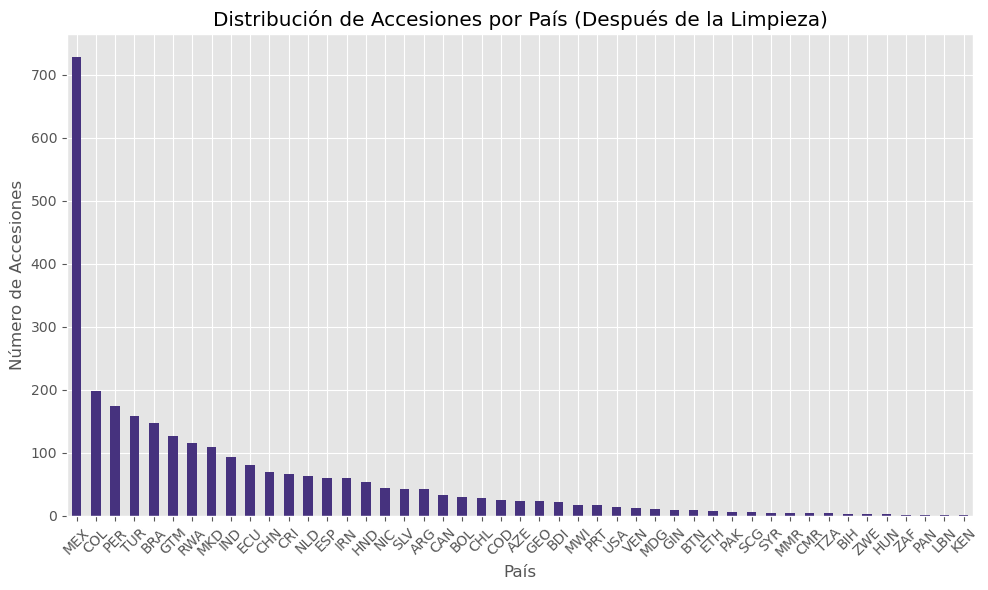

In [32]:
plt.figure(figsize=(10, 6))
df_final['ORIGCTY'].value_counts().plot(kind='bar')
plt.title('Distribución de Accesiones por País (Después de la Limpieza)')
plt.xlabel('País')
plt.ylabel('Número de Accesiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Celda 8: Guardar el dataset limpio en un nuevo archivo Excel
# Este archivo es tu GOLDEN DATASET para las siguientes fases (FIGS y ML)
output_filename = 'Phaseolus_vulgaris_CLEAN.xlsx'
df_final.to_excel(output_filename, index=False)
print(f"Dataset limpio guardado como: {output_filename}")

Dataset limpio guardado como: Phaseolus_vulgaris_CLEAN.xlsx


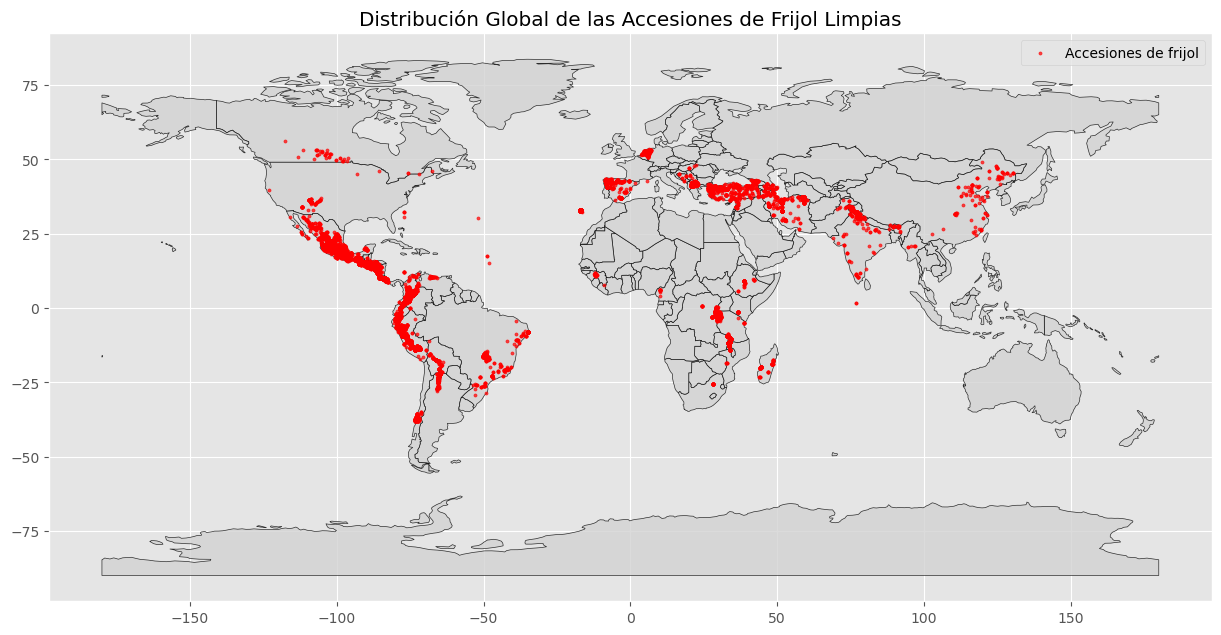

In [38]:
geometry = [Point(lon, lat) for lon, lat in zip(df_clean['DECLONGITUDE'], df_clean['DECLATITUDE'])]
gdf = gpd.GeoDataFrame(df_clean, geometry=geometry, crs='EPSG:4326')  # Asegurar el mismo CRS

# Celda 5: Graficar tus accesiones sobre el mapa
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.8)
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.7, label='Accesiones de frijol')

plt.title('Distribución Global de las Accesiones de Frijol Limpias')
plt.legend()
plt.show()

In [24]:
df_final.describe()

,SPAUTHOR,SUBTAXA,SUBTAUTHOR,GRIN_TAXON_ID,SAMPSTAT,ACQDATE,DECLATITUDE,DECLONGITUDE,COORDUNCERT,COORDDATUM,...,COLLCODE,COLLNAME,COLLINSTADDRESS,COLLMISSID,BREDNAME,DUPLINSTNAME,STORAGE,REMARKS,DATAPROVIDERID,LASTMODIFIED
count,0.0,0.0,0.0,2768.0,2768.000000,2.768000e+03,2768.000000,2768.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2768.0,0.0,0.0,2768
mean,NaN,NaN,NaN,27632.0,281.683526,1.980238e+07,15.503320,-43.310217,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2025-03-11 16:44:53.033959680
min,NaN,NaN,NaN,27632.0,100.000000,1.970090e+07,-38.030000,-123.250000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2025-03-11 16:34:59
25%,NaN,NaN,NaN,27632.0,300.000000,1.973010e+07,0.365000,-96.120000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2025-03-11 16:41:26
50%,NaN,NaN,NaN,27632.0,300.000000,1.978120e+07,17.420000,-75.825000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2025-03-11 16:45:09
75%,NaN,NaN,NaN,27632.0,300.000000,1.986020e+07,30.252500,22.252500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2025-03-11 16:47:42.249999872
max,NaN,NaN,NaN,27632.0,300.000000,2.013022e+07,56.190000,130.280000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2025-03-11 16:51:53
std,NaN,NaN,NaN,0.0,56.270536,8.828692e+04,19.852318,63.697287,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [25]:
df_final['ORIGCTY'].value_counts()

ORIGCTY
MEX    728
COL    198
PER    174
TUR    158
BRA    148
GTM    127
RWA    115
MKD    109
IND     93
ECU     81
CHN     70
CRI     67
NLD     64
ESP     61
IRN     61
HND     54
NIC     44
SLV     43
ARG     42
CAN     33
BOL     30
CHL     29
COD     25
AZE     24
GEO     24
BDI     22
MWI     18
PRT     17
USA     14
VEN     12
MDG     11
GIN     10
BTN     10
ETH      8
PAK      7
SCG      6
SYR      5
MMR      5
CMR      4
TZA      4
BIH      3
ZWE      3
HUN      3
ZAF      1
PAN      1
LBN      1
KEN      1
Name: count, dtype: int64